# Import Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, auc)
from sklearn.model_selection import cross_val_score

# Load Dataset

In [64]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
# shape of the dataframe
data.shape

(569, 32)

In [66]:
# concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
# column names
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [68]:
# checking for null values
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [69]:
# descriptive statistics of data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [70]:
# Convert diagnosis to binary (M=1, B=0)
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [71]:
# Separate features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#Diagnosis Distribution (Target Variable)

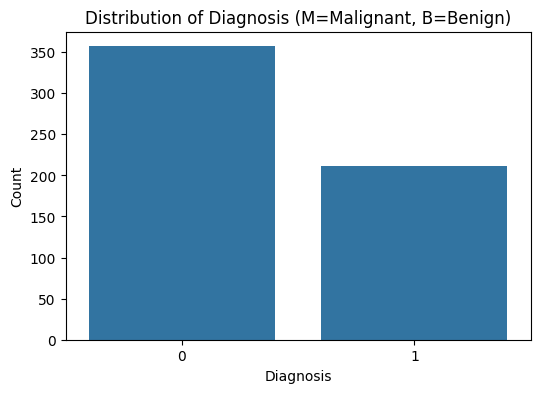

In [72]:
# Diagnosis distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Diagnosis (M=Malignant, B=Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

#Pairplot of Selected Features

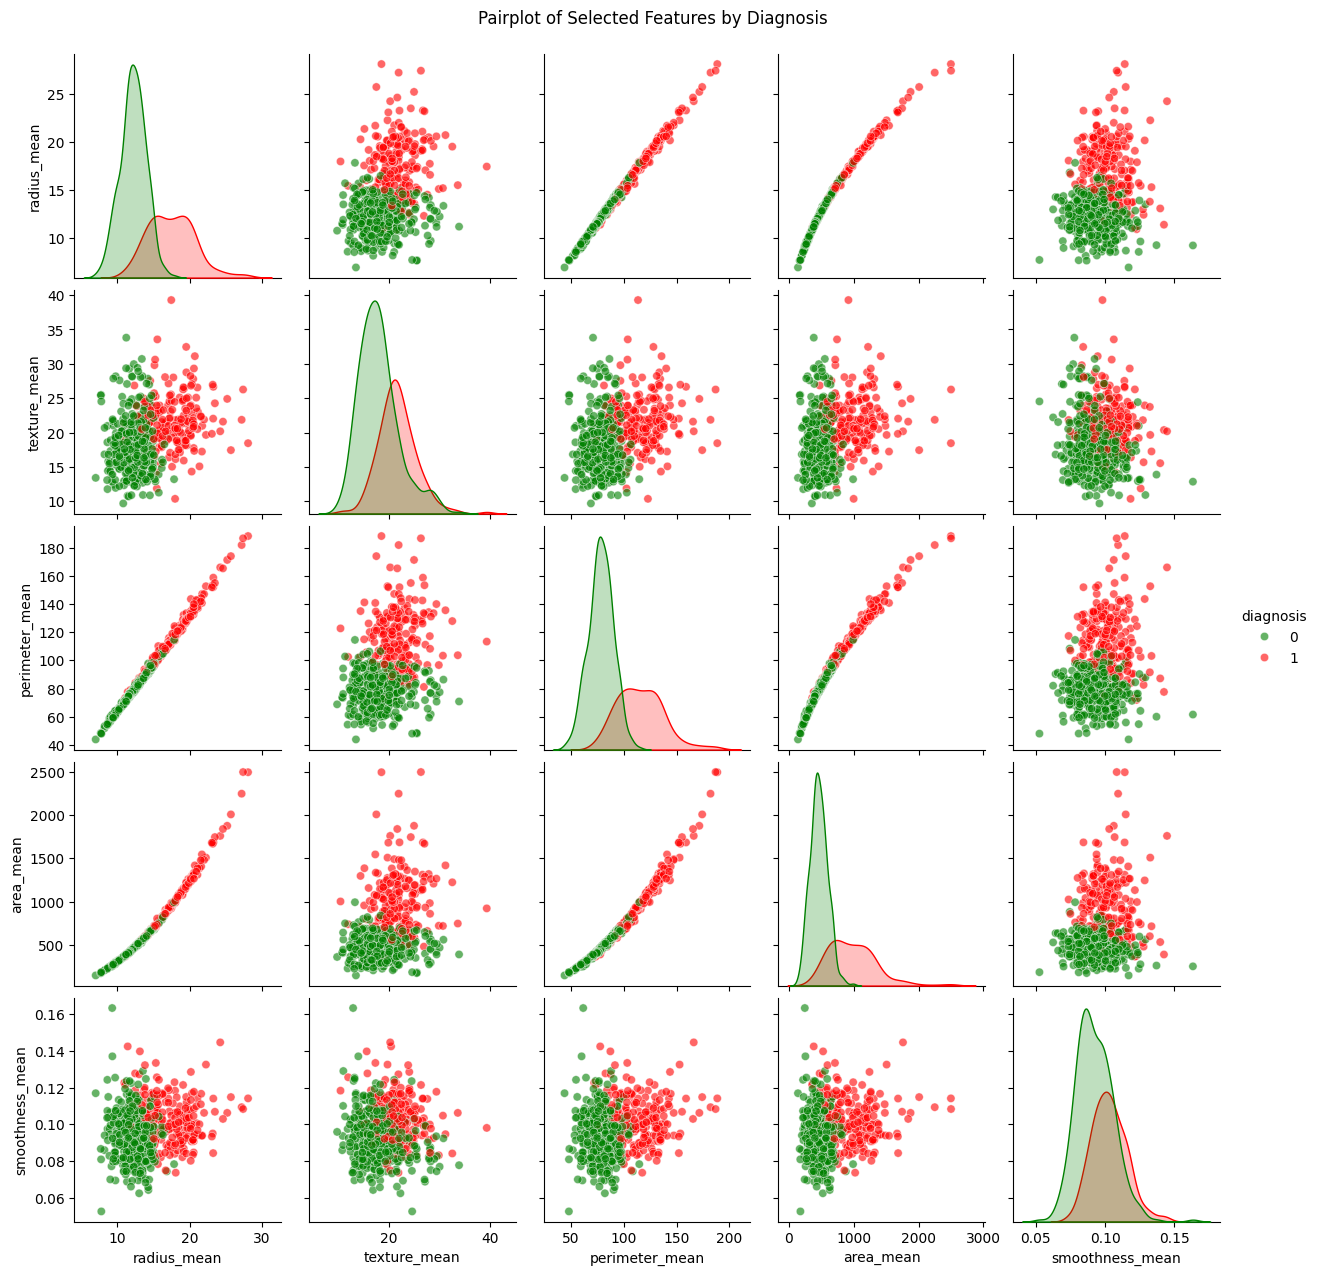

In [73]:
# Select a subset of features for pairplot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
subset = pd.concat([X[selected_features], y], axis=1)

# Create pairplot
sns.pairplot(subset, hue='diagnosis', palette={0: 'green', 1: 'red'},
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

#Boxplots of Key Features by Diagnosis

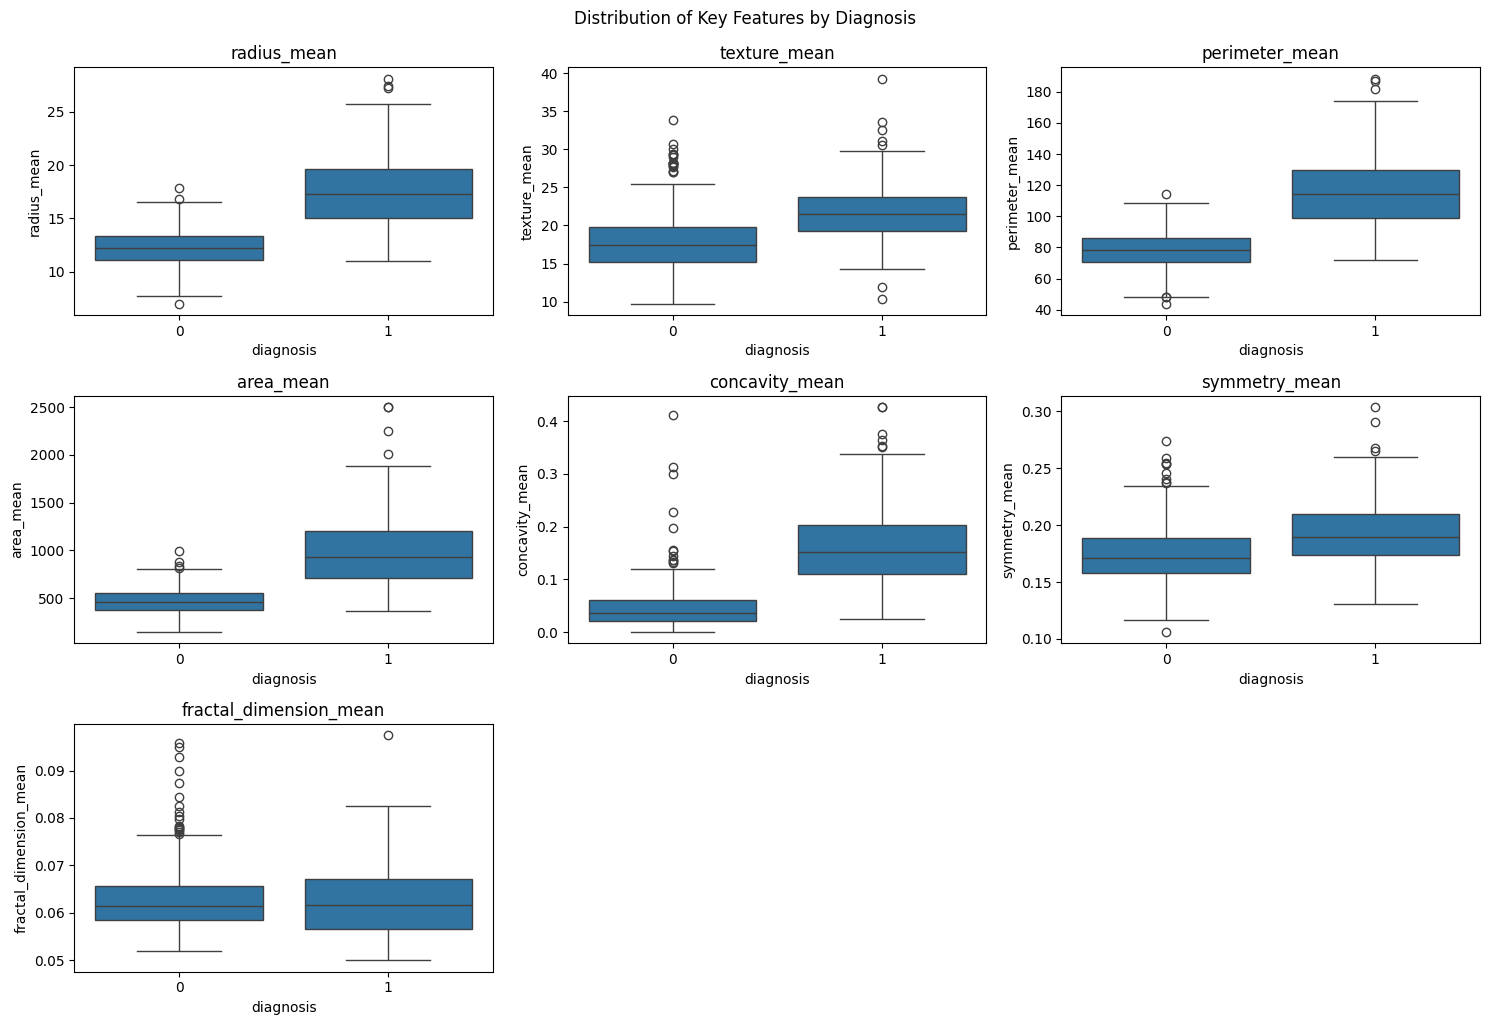

In [74]:
# Select key features for boxplot
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=y, y=X[feature])
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Distribution of Key Features by Diagnosis', y=1.02)
plt.show()

#Distribution Plot with Hue

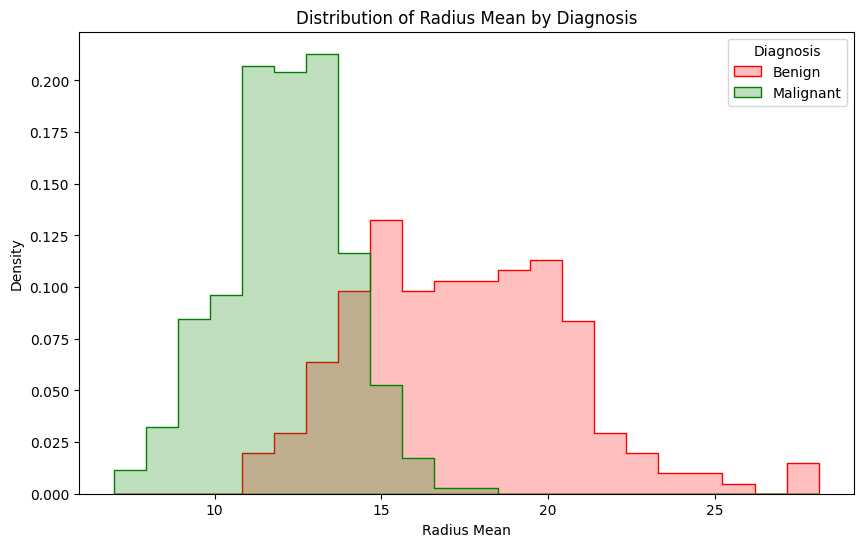

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X, x='radius_mean', hue=y, element='step', stat='density',
             common_norm=False, palette={0:'green', 1:'red'})
plt.title('Distribution of Radius Mean by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
plt.show()

# Correlation Matrix

In [76]:
# Calculate correlation matrix
corr_matrix = data.drop('diagnosis', axis=1).corr()
corr_array = corr_matrix.values
matrix_cols = corr_matrix.columns.tolist()

# Plotting
trace = go.Heatmap(z=corr_array,
                  x=matrix_cols,
                  y=matrix_cols,
                  xgap=2,
                  ygap=2,
                  colorscale='Viridis',
                  colorbar=dict(),
                  )

layout = go.Layout(dict(title='Correlation Matrix for variables',
                       autosize=False,
                       height=720,
                       width=800,
                       margin=dict(r=0, l=210,
                                   t=25, b=210,
                                   ),
                       yaxis=dict(tickfont=dict(size=9)),
                       xaxis=dict(tickfont=dict(size=9)),
                       )
)

fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig)

# Split data into train and test sets

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [78]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Dictionary to store model performance
results = {}


# Function to evaluate models

In [80]:

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores),
        'model': model,
        'y_pred_prob': y_pred_prob
    }

    # Print results (these were previously outside the function due to indentation)
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model

In [81]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)  # Enable probability for ROC
}

# Evaluate each model

In [82]:

for name, model in models.items():
    evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, name)


Logistic Regression Results:
Accuracy: 0.9825
ROC AUC: 0.9979
Cross-validation scores: [0.975      0.975      1.         0.96202532 0.94936709]
Mean CV accuracy: 0.9723 (±0.0168)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
[[106   2]
 [  1  62]]

Decision Tree Results:
Accuracy: 0.9357
ROC AUC: 0.9392
Cross-validation scores: [0.9625     0.9375     0.875      0.93670886 0.88607595]
Mean CV accuracy: 0.9196 (±0.0334)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg

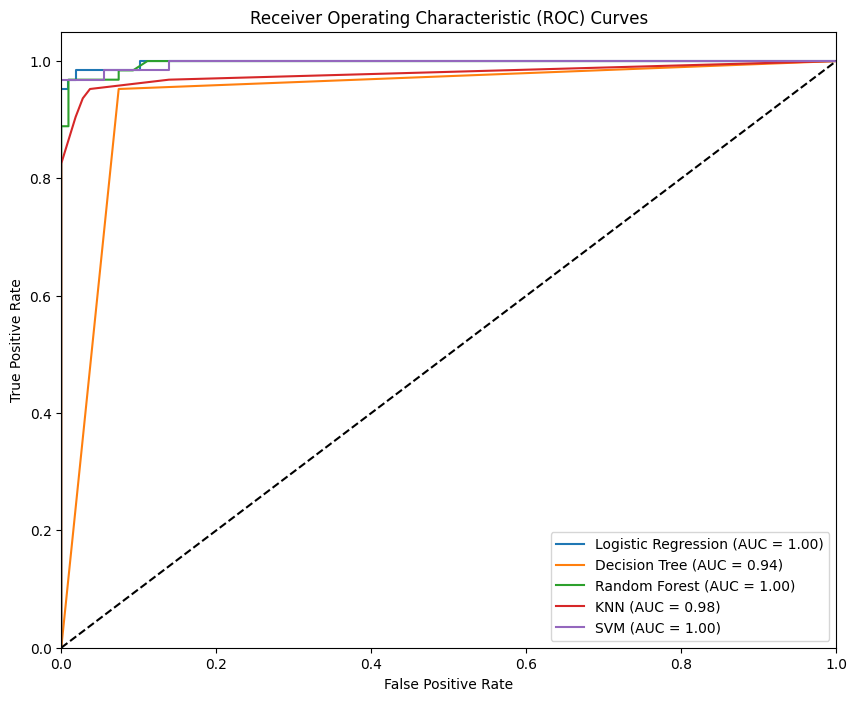


Model Performance Comparison:
                     accuracy   roc_auc   cv_mean    cv_std
Logistic Regression  0.982456  0.997942  0.972278  0.016813
Random Forest        0.976608  0.996473  0.949715  0.008160
SVM                  0.976608  0.996914  0.964778  0.014834
KNN                  0.959064  0.978542  0.952215  0.009644
Decision Tree        0.935673  0.939153  0.919557  0.033366


In [83]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Feature importance for Random Forest
rf_model = results['Random Forest']['model']
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)



# Compare model performance
performance_df = pd.DataFrame.from_dict(results, orient='index')
performance_df = performance_df[['accuracy', 'roc_auc', 'cv_mean', 'cv_std']]
performance_df = performance_df.sort_values('accuracy', ascending=False)
print("\nModel Performance Comparison:")
print(performance_df)